# Import libraries

In [1]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Visualization imports
import plotly.graph_objects as go
import plotly.express as px


In [2]:
import warnings
warnings.filterwarnings('ignore')

#load Dataset

In [3]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Information about Dataset

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
df.shape

(374, 13)

In [7]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

#Check Duplicate

In [8]:
df.duplicated().sum()

0

#Check null values

In [9]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#Dataset summary

In [11]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [12]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [13]:
df.drop('Person ID', axis = 1, inplace = True)

In [14]:
# Check numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]

Object Columns:

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/8

#Drop null values

In [15]:
# Drop rows with 'None' values in the 'Sleep Disorder' column
df = df.dropna(subset=['Sleep Disorder'])

# Now, 'df' will contain only rows where the 'Sleep Disorder' column does not have 'None' values


In [16]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# Exploratory Data Analysis (EDA)

#Distribution of Gender

In [17]:
# Create a pie chart to visualize the distribution of gender
gender_distribution = df['Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']

fig = px.pie(gender_distribution, values='Count', names='Gender',
             title='Distribution of Gender',
             color_discrete_sequence=px.colors.qualitative.Set2)

# Update layout for a professional look
fig.update_layout(
    title_font=dict(size=20, family="Arial", color="black"),
    legend_title_font=dict(size=16, family="Arial", color="black"),
    font=dict(size=14, family="Arial", color="black")
)

# Show plot
fig.show()


#Distribution of Age

In [18]:

# Create a bar plot to visualize the distribution of age
fig = px.histogram(df, x='Age', title='Distribution of Age', color_discrete_sequence=['#458B74'])

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title_font=dict(size=24, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='', yanchor="top", y=0.99, xanchor="right", x=0.99),
    barmode='overlay',
    bargap=0.1  # Adjust the value to set the gap between bars
)

# Show plot
fig.show()


#Distribution of Occupation

In [19]:
# Create a bar plot to visualize the distribution of occupation
fig = px.histogram(df, x='Occupation', title='Distribution of Occupation', color_discrete_sequence=['#8B008B'])

fig.update_layout(
    xaxis_title='',
    yaxis_title='Count',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='', yanchor="top", y=0.99, xanchor="right", x=0.99),
    bargap=0.1,  # Adjust the gap between bars
    xaxis_tickangle=45
)

# Set y-axis limits and ticks
fig.update_yaxes(range=[0, 80], tickvals=list(range(0, 81, 10)))

# Show plot
fig.show()


#Distribution of Age by Gender

In [20]:
# Group by gender and calculate summary statistics
summary_stats = df.groupby('Gender')['Age'].agg(['min', 'mean', 'max', 'std']).reset_index()
summary_stats['difference'] = summary_stats['max'] - summary_stats['min']

# Print summary statistics
print(summary_stats)

# Create a Plotly bar chart to visualize the distribution of age by gender
fig = px.histogram(df, x='Age', color='Gender', barmode='group',
                   title='Distribution of Age by Gender',
                   color_discrete_map={"Female": "#F4A460", "Male": "#20B2AA"})

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title_font=dict(size=24, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='Gender', yanchor="top", y=0.99, xanchor="right", x=0.99),
    bargap=0.1,  # Adjust the gap between bars
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Set y-axis limits and ticks
fig.update_yaxes(range=[0, 40], tickvals=list(range(0, 41, 10)))

# Show plot
fig.show()


   Gender  min       mean  max       std  difference
0  Female   29  49.378641   59  7.438791          30
1    Male   28  41.192308   49  5.430627          21


 In this data set,older people are predominantly female

#Distribution of Occupation by Gender

In [21]:


# Group by gender and occupation and calculate the count of each combination
occupation_gender_counts = df.groupby(['Occupation', 'Gender']).size().reset_index(name='Count')

# Pivot the data to have separate columns for each gender
pivot_df = occupation_gender_counts.pivot(index='Occupation', columns='Gender', values='Count').reset_index()

# Create a Plotly bar chart to visualize the distribution of occupation by gender
fig = px.bar(pivot_df, x='Occupation', y=['Female', 'Male'],
             title='Distribution of Occupation by Gender',
             color_discrete_map={"Female": "#F4A460", "Male": "#20B2AA"})

fig.update_layout(
    xaxis_title='',
    yaxis_title='Count',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='Gender', yanchor="top", y=0.99, xanchor="right", x=0.99),
    bargap=0.1,  # Adjust the gap between bars
    xaxis_tickangle=45,
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Set y-axis limits and ticks
fig.update_yaxes(range=[0, 80], tickvals=list(range(0, 81, 10)))

# Show plot
fig.show()


##Sleep_disorder¶


Sleep_disorder distribution

In [22]:
fig = go.Figure(data=[go.Pie(labels=df['Sleep Disorder'].value_counts().index,
                             values=df['Sleep Disorder'].value_counts())])
fig.update_layout(title= 'Sleep Disorder')
fig.show()

Gender distribution by sleep disorder

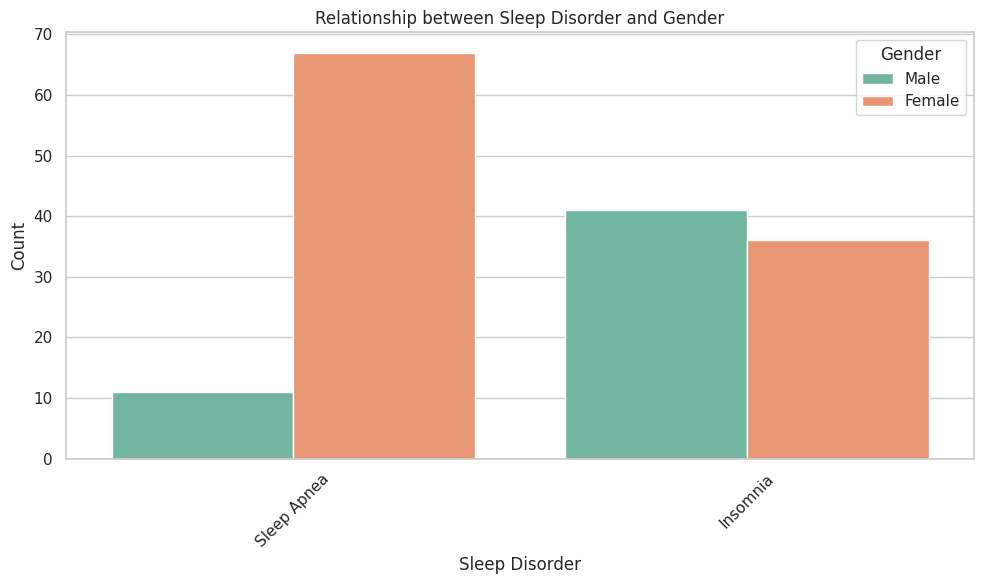

In [23]:
# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a count plot to visualize the relationship between Sleep Disorder and Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sleep Disorder', hue='Gender', palette='Set2')

# Adding labels and titles
plt.title('Relationship between Sleep Disorder and Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')

# Show plot
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In this data set, the prevalence of sleep apnea is higher in women than in men. However, when examining the age distribution between the genders, it appears that older people are predominantly female. Age is also a factor influencing sleep disorders, particularly sleep apnea

#Sleep_disorder and occupation

In [24]:


# Create a Plotly bar chart to visualize the distribution of sleep disorders by occupation
fig = px.histogram(df, x='Occupation', color='Sleep Disorder',
                   title='Occupation and Sleep Disorder',
                   color_discrete_sequence=px.colors.qualitative.Dark2)

fig.update_layout(
    xaxis_title='',
    yaxis_title='Count',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    bargap=0.1,  # Adjust the gap between bars
    xaxis_tickangle=45,
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Set y-axis limits and ticks
fig.update_yaxes(range=[0, 80], tickvals=list(range(0, 81, 10)))

# Show plot
fig.show()


Sleep apnea is highly represented among nurses, probably due to the fact that the nurses in this dataset are all women and are on average older than other occupations. Insomnia is highly represented among salespersons and teachers

#Sleep_disorder and age

In [27]:


# Create a density plot for the distribution of age by sleep disorder
density_plot_fig = px.histogram(df, x='Age', color='Sleep Disorder',
                                marginal='rug',
                                title='Density plot of Age by Sleep Disorder',
                                labels={'Age': 'Age', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Density',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots

density_plot_fig.show()


There is a significant difference between levels of sleep disorder in terms of means of age. Individuals suffering from sleep apnea tend to be older.

#Sleep_disorder and stress_leve

In [28]:


# Create a density plot for the distribution of stress level by sleep disorder
density_plot_fig = px.histogram(df, x='Stress Level', color='Sleep Disorder',
                                marginal='rug',
                                title='Density plot of Stress Level by Sleep Disorder',
                                labels={'Stress Level': 'Stress Level', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Stress Level',
    yaxis_title='Density',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=16, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots

density_plot_fig.show()


There is a significant difference between levels of sleep disorder in terms of means of stress leve, Individuals suffering from insomnia tend to have higher stress levels

#Sleep_disorder and heart_rate

In [29]:


# Create a density plot for the distribution of heart rate by sleep disorder
density_plot_fig = px.histogram(df, x='Heart Rate', color='Sleep Disorder',
                                marginal='rug',
                                title='Density plot of Heart Rate by Sleep Disorder',
                                labels={'Heart Rate': 'Heart Rate (bpm)', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Heart Rate (bpm)',
    yaxis_title='Density',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=16, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots

density_plot_fig.show()


There is a significant difference between levels of sleep disorder in terms of the means of heart rate. Individuals with sleep disorders tend to have an higher heart rate.

#Sleep_disorder and Blood Pressure

In [30]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [32]:

# Create a density plot for the distribution of systolic blood pressure by sleep disorder
density_plot_fig = px.histogram(df, x='Systolic', color='Sleep Disorder',
                                marginal='rug',
                                title='Density plot of Systolic Blood Pressure by Sleep Disorder',
                                labels={'Systolic': 'Systolic', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Systolic Blood Pressure',
    yaxis_title='Density',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=16, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots

density_plot_fig.show()


There is a significant difference between levels of sleep disorder in terms of the means of blood pressure. Individuals with sleep disorders tend to have an higher blood pressure

#Sleep_disorder and bmi_category

In [33]:
# Create a grouped bar plot for the distribution of BMI category by sleep disorder
fig = px.bar(df, x='BMI Category', color='Sleep Disorder',
             title='Distribution of BMI Category by Sleep Disorder',
             labels={'BMI Category': 'BMI Category', 'count': 'Count'},
             barmode='group')


fig.update_layout(
    xaxis_title='',
    yaxis_title='Count',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=18, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plot
fig.show()


There seems to be a link between overweight and insomnia or sleep apnea. Overweight people seem to suffer more from sleep disorders than non-overweight people

#Sleep_disorder and physical_activity_level (minutes/day

In [34]:
# Create a box plot for the distribution of physical activity by sleep disorder
boxplot_fig = px.box(df, x='Sleep Disorder', y='Heart Rate',
                     title='Distribution of Physical Activity by Sleep Disorder',
                     color='Sleep Disorder',
                     labels={'Heart Rate': 'Physical Activity Level (minutes/day)', 'Sleep Disorder': 'Sleep Disorder'})


boxplot_fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Physical Activity Level (minutes/day)',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=16, family="Arial", color="black"),
    legend=dict(title='', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Create a density plot for the distribution of physical activity by sleep disorder
density_plot_fig = px.histogram(df, x='Heart Rate', color='Sleep Disorder',
                                marginal='rug',
                                title='Density Plot of Physical Activity by Sleep Disorder',
                                labels={'Heart Rate': 'Physical Activity Level (minutes/day)', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Physical Activity Level (minutes/day)',
    yaxis_title='Density',
    title_font=dict(size=20, family="Arial", color="black"),
    font=dict(size=16, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots
boxplot_fig.show()
density_plot_fig.show()

# Summary table
summary_table = df.groupby('Sleep Disorder')['Heart Rate'].describe().reset_index()
print(summary_table)


  Sleep Disorder  count       mean       std   min   25%   50%   75%   max
0       Insomnia   77.0  70.467532  4.948643  65.0  65.0  72.0  72.0  85.0
1    Sleep Apnea   78.0  73.089744  5.117289  68.0  68.0  75.0  75.0  86.0



The summary statistics indicate that individuals with insomnia have a mean physical activity level of approximately 70.47 minutes/day, with a standard deviation of 4.95 minutes/day. The minimum physical activity level observed is 65 minutes/day, while the maximum is 85 minutes/day.

On the other hand, individuals with sleep apnea exhibit a slightly higher mean physical activity level of approximately 72.75 minutes/day, with a standard deviation of 4.72 minutes/day. The minimum physical activity level observed is 68 minutes/day, while the maximum is 85 minutes/day.

Overall, the summary suggests that individuals with sleep apnea tend to have a slightly higher mean physical activity level compared to those with insomnia. However, both groups show variability in physical activity levels, as indicated by the standard deviations.

#Sleep_disorder and quality of sleep

In [35]:


# Density plot for the distribution of quality of sleep by sleep disorder
density_plot_fig = px.histogram(df, x='Quality of Sleep', color='Sleep Disorder',
                                marginal='rug',
                                title='Density Plot of Quality of Sleep by Sleep Disorder',
                                labels={'Quality of Sleep': 'Quality of Sleep', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Quality of Sleep',
    yaxis_title='Density',
    title_font=dict(size=16, family="Arial", color="black"),
    font=dict(size=14, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots

density_plot_fig.show()


There is a significant difference between levels of sleep disorder in terms of means of quality of sleep, Individuals suffering from insomnia tend to have poorer sleep qualit

#Sleep_disorder and sleep duration

In [36]:


# Density plot for the distribution of sleep duration by sleep disorder
density_plot_fig = px.histogram(df, x='Sleep Duration', color='Sleep Disorder',
                                marginal='rug',
                                title='Density Plot of Sleep Duration by Sleep Disorder',
                                labels={'Sleep Duration': 'Sleep Duration (hours)', 'count': 'Density'})


density_plot_fig.update_layout(
    xaxis_title='Sleep Duration (hours)',
    yaxis_title='Density',
    title_font=dict(size=16, family="Arial", color="black"),
    font=dict(size=14, family="Arial", color="black"),
    legend=dict(title='Sleep Disorder', yanchor="top", y=0.99, xanchor="right", x=0.99),
    plot_bgcolor='white',  # Set background color of plot
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins
)

# Show plots

density_plot_fig.show()
# Grouping the data by sleep disorder and calculating summary statistics for sleep duration
summary_statistics = df.groupby('Sleep Disorder')['Sleep Duration'].describe()

# Displaying the summary statistics
print(summary_statistics)


                count      mean       std  min  25%  50%  75%  max
Sleep Disorder                                                    
Insomnia         77.0  6.589610  0.387157  5.9  6.4  6.5  6.6  8.3
Sleep Apnea      78.0  7.032051  0.974812  5.8  6.1  6.8  8.1  8.2


There is a significant difference between levels of sleep disorder in terms of means of sleep duration, Individuals suffering from insomnia tend to sleep less

#Quality_of_sleep and stress level

In [37]:
# Create a scatter plot with trendline
scatter_plot = px.scatter(df, x='Quality of Sleep', y='Stress Level', trendline="ols",
                          title="Quality of Sleep and Stress Level",
                          labels={'quality_of_sleep': 'Quality of Sleep', 'stress_level': 'Stress Level'})


scatter_plot.update_layout(
    xaxis=dict(title=dict(text="Quality of Sleep")),
    yaxis=dict(title=dict(text="Stress Level")),
    font=dict(size=20, family="Arial, sans-serif"),
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
scatter_plot.show()


Sleep quality declines as stress levels increase

#Sleep_duration and stress level

In [38]:
# Create a scatter plot with trendline
scatter_plot = px.scatter(df, x='Sleep Duration', y='Stress Level', trendline="ols",
                          title="Sleep Duration and Stress Level",
                          labels={'sleep_duration': 'Sleep Duration', 'stress_level': 'Stress Level'})


scatter_plot.update_layout(
    xaxis=dict(title=dict(text="Sleep Duration")),
    yaxis=dict(title=dict(text="Stress Level")),
    font=dict(size=20, family="Arial, sans-serif"),
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
scatter_plot.show()




Sleep duration decreases when stress levels increase.

#Conclusion

***Sleep Apnea:***

Sleep apnea is associated with age, obesity, and hypertension. While it can occur at any age, sleep apnea becomes more prevalent as individuals age. Overweight individuals are at an increased risk of developing sleep apnea. There is a known correlation between hypertension and sleep apnea. Research has established a bidirectional association between these two conditions: People with sleep apnea are more likely to develop high blood pressure, and individuals with hypertension are more likely to have sleep apnea.

*Prevention:*

Maintain a healthy lifestyle.
Practice regular physical activity.
Insomnia:

**Insomnia:**

 is a common sleep disorder that can make it difficult to fall asleep or stay asleep. In this study, insomnia is linked to a reduction in sleep quality and duration, as well as higher stress levels. Short-term insomnia is usually caused by stress or a distressing event. When insomnia is severe or prolonged, it can lead to sleep deprivation. Sleep deprivation can increase the risk of certain conditions such as high blood pressure, anxiety, obesity, and sleep apnea.

#Feature Engineering

In [ ]:
# Calculate the upper and lower limits
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Find the indices of values exceeding the upper limit
upper_indices = np.where(df['Heart Rate'] >= upper)[0]

# Convert indices to labels
upper_labels = df.index[upper_indices]

# Drop rows with labels exceeding the upper limit
df = df.drop(index=upper_labels)

# Now, 'df' will contain rows where the 'Heart Rate' column values are within the upper limit


In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic'],
      dtype='object')

In [ ]:
# Create a copy of the DataFrame with only the selected columns
df_selected = df.copy()

drop the blood pressure  columns because we already split the blood pressure into two columns  systolic and diasystolic

In [ ]:
df_selected = df_selected.drop(['Blood Pressure',], axis = 1)

# one-hot encoding

In [ ]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI Category'], drop_first = True, dtype = int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 3 to 373
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              153 non-null    int64  
 1   Sleep Duration                   153 non-null    float64
 2   Quality of Sleep                 153 non-null    int64  
 3   Physical Activity Level          153 non-null    int64  
 4   Stress Level                     153 non-null    int64  
 5   Heart Rate                       153 non-null    int64  
 6   Daily Steps                      153 non-null    int64  
 7   Sleep Disorder                   153 non-null    object 
 8   Systolic                         153 non-null    int64  
 9   Diastolic                        153 non-null    int64  
 10  Gender_Male                      153 non-null    int64  
 11  Occupation_Doctor                153 non-null    int64  
 12  Occupation_Engineer        

In [ ]:
label_encoder = LabelEncoder()
df_encoded['Sleep Disorder'] = label_encoder.fit_transform(df_encoded['Sleep Disorder'])

In [ ]:
df_encoded.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'Gender_Male', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

#correlation matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

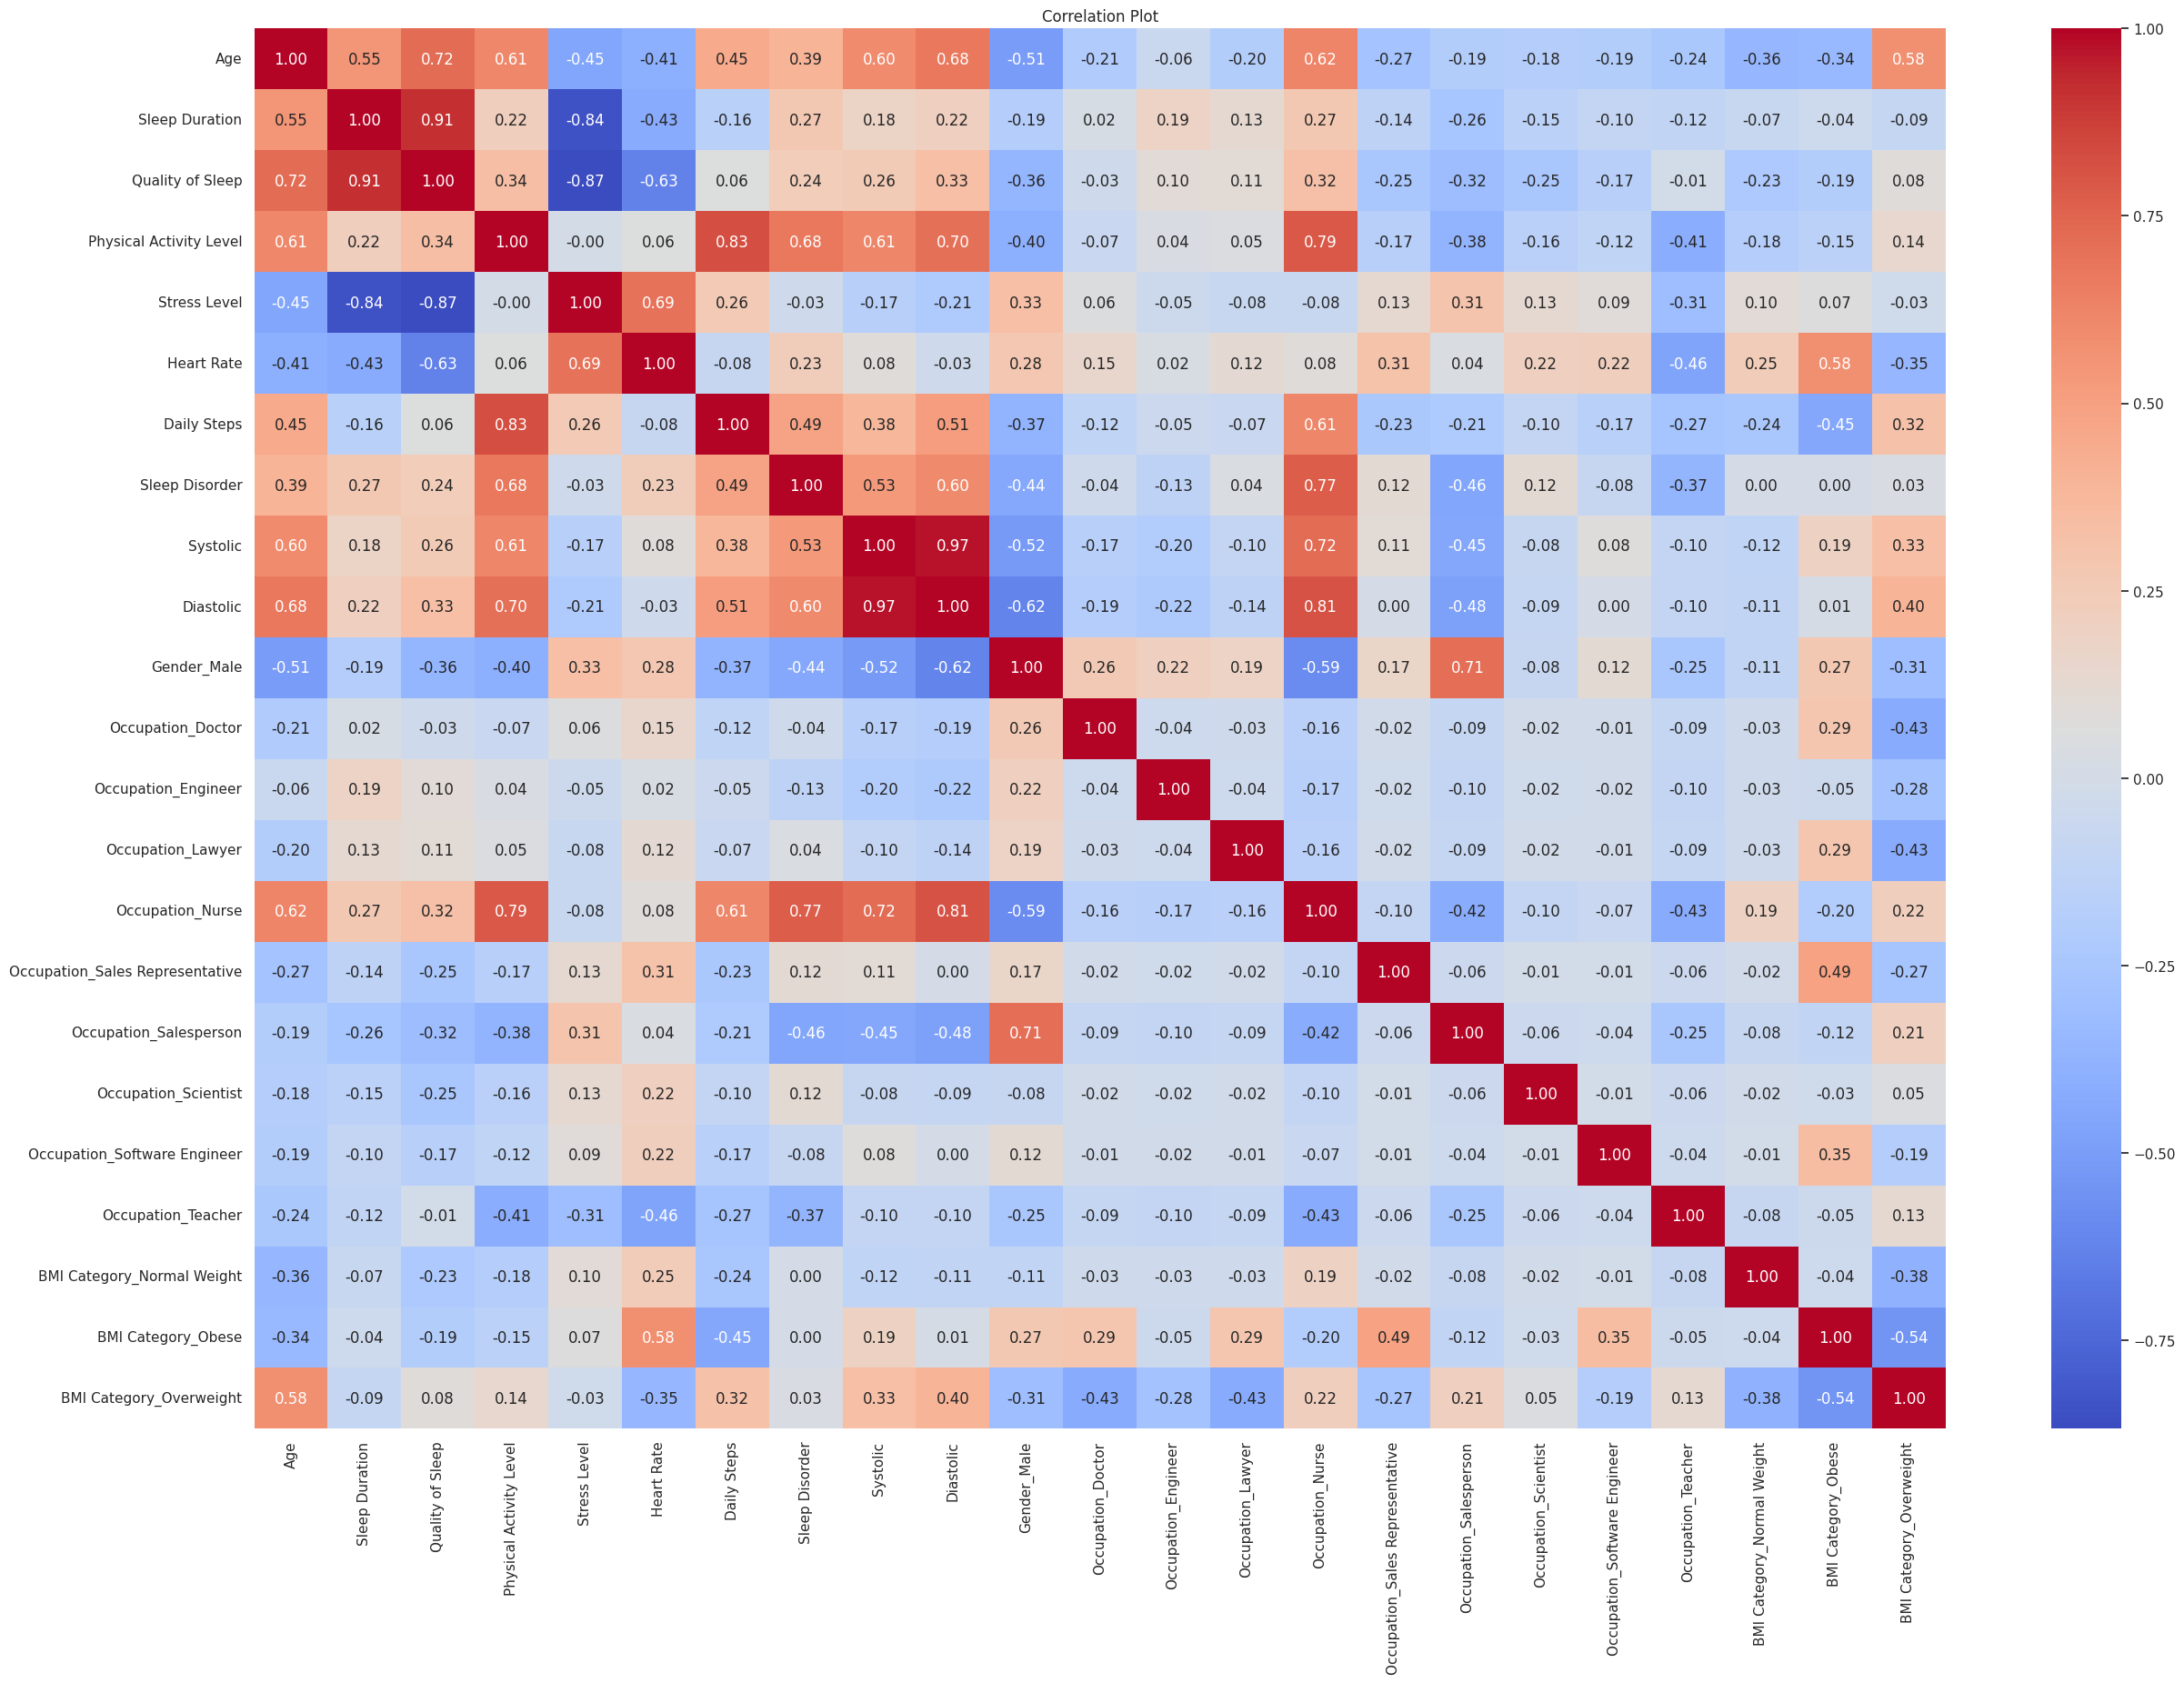

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

#feature importance scores

In [ ]:
X = df_encoded.drop('Sleep Disorder', axis=1) # Drop the target variable from the featu
y = df_encoded['Sleep Disorder']

# Create a random forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print(feature_importance_df)

                            Feature  Importance
3           Physical Activity Level    0.137221
8                         Diastolic    0.129618
0                               Age    0.124483
7                          Systolic    0.115082
13                 Occupation_Nurse    0.098027
6                       Daily Steps    0.090876
5                        Heart Rate    0.075273
1                    Sleep Duration    0.069744
2                  Quality of Sleep    0.034606
9                       Gender_Male    0.022978
4                      Stress Level    0.019878
18               Occupation_Teacher    0.019850
21          BMI Category_Overweight    0.013487
14  Occupation_Sales Representative    0.009920
20               BMI Category_Obese    0.007115
12                Occupation_Lawyer    0.006539
15           Occupation_Salesperson    0.006322
17     Occupation_Software Engineer    0.005743
11              Occupation_Engineer    0.005546
10                Occupation_Doctor    0

# Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", log_accuracy)

Accuracy: 0.8709677419354839


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.87      0.87      0.87        15

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.8709677419354839


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.87      0.87      0.87        15

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_accuracy)

Accuracy: 0.9354838709677419


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.87      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



In [ ]:


# Define hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search using cross-validation
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy')

# Fit grid search to the data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

# Train Random Forest model with best parameters
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict using the tuned Random Forest model
rf_predictions = best_rf.predict(X_test)

# Calculate accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)




Random Forest Accuracy: 0.8387096774193549


In [ ]:
import plotly.graph_objects as go

# Calculate accuracy for each model
accuracies = [log_accuracy, dt_accuracy, xgb_accuracy, rf_accuracy]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Random Forest']

# Convert accuracies to percentages
accuracies_percent = [round(acc * 100, 2) for acc in accuracies]

# Create bar graph
fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies_percent)])

# Add percentage labels on each bar
for i, acc in enumerate(accuracies_percent):
    fig.add_annotation(
        x=model_names[i],
        y=acc,
        text=f'{acc}%',
        showarrow=False,
        font=dict(color='black', size=12),
        yshift=10
    )

# Update graph layout
fig.update_layout(title='Accuracy of Different Models',
                  xaxis_title='Model',
                  yaxis_title='Accuracy (%)')

# Show the graph
fig.show()
